In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from alpha_connect import (
    play_connect4_games,
    play_game,
    NeuralNetAgent,
    MCTSAgent,
    HumanAgent,
    AlphaZeroAgent,
    OneMoveAheadAgent,
    RandomAgent,
)
from game import ConnectState


State = ConnectState

In [3]:
supervised_agent = NeuralNetAgent()

In [4]:
MCTS_agent = MCTSAgent()

In [5]:
human_agent = HumanAgent()
one_move_ahead_agent = OneMoveAheadAgent()

In [6]:
from alpha_connect import AlphaZeroModelConnect4
import torch


model = AlphaZeroModelConnect4()
model.load_state_dict(torch.load("../data/latest.pth"))

alpha_zero_agent = AlphaZeroAgent(NeuralNetAgent(model), 200)

In [13]:
sum([0.1230, 0.1330, 0.1513, 0.1747, 0.1368, 0.1250, 0.1281])

0.9719

In [7]:
print(play_connect4_games(alpha_zero_agent, MCTSAgent(1000), 10000, True))

Game 0
{'agent1': 0, 'agent2': 0, 'draws': 0}


/Users/alberttroussard/Documents/alpha-connect/src/alpha_connect/neural_net_agent.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(input, device="mps").type(torch.float32).view(1, 3, 6, 7)


O . X O O X X 
X . O O X X O 
X . O O O X X 
O O X X X O O 
O X X O X O X 
O O X X X O O 
Game 1
{'agent1': 0, 'agent2': 1, 'draws': 0}
. . X . . . . 
. . O X . . . 
O O O X X . . 
X X O O O . . 
X O X O X . . 
X O O X O O X 
Game 2
{'agent1': 1, 'agent2': 1, 'draws': 0}
. . . . . . . 
. . . X X . . 
O O . X X X O 
X O . O O O X 
X O . O X O X 
X O O X O O X 
Game 3
{'agent1': 2, 'agent2': 1, 'draws': 0}
O . O X O . X 
X . O X O . X 
O . O O O . O 
X X X X X . O 
X O O O X . O 
X X O X O X X 
Game 4
{'agent1': 2, 'agent2': 2, 'draws': 0}
. . . . . . . 
. . . . . . . 
. . . . . . . 
. . . X . . . 
. . . X . . . 
. . X O O O O 
Game 5
{'agent1': 2, 'agent2': 3, 'draws': 0}


KeyboardInterrupt: 

[42.8842504743833, 0.3795066413662239, 56.73624288425047]
[42.8842504743833, 43.26375711574953, 100.0]


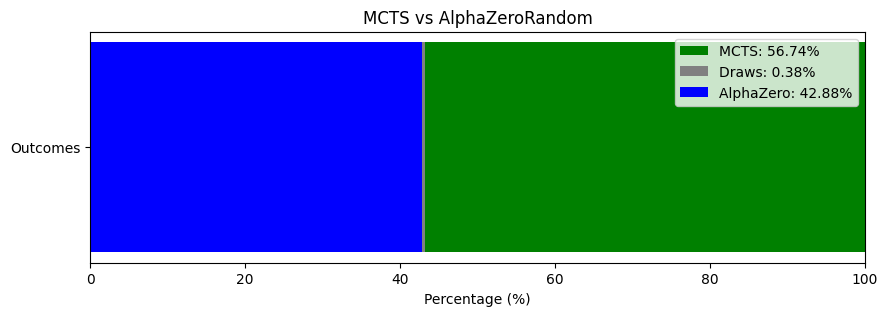

In [ ]:
import matplotlib.pyplot as plt

d = {"AlphaZero": 452, "draws": 4, "MCTS": 598}

# Calculating percentages for the outcomes
total = sum(d.values())
percentages = [(v / total) * 100 for v in d.values()]
cumulative_percentages = [sum(percentages[: i + 1]) for i in range(len(percentages))]
print(percentages)
print(cumulative_percentages)
# Plotting the data as a single stacked horizontal bar
plt.figure(figsize=(10, 3))
plt.barh(
    ["Outcomes"],
    cumulative_percentages[::-1],
    color=[
        "green",
        "grey",
        "blue",
    ],
    label=[
        "MCTS: {:.2f}%".format(percentages[2]),
        "Draws: {:.2f}%".format(percentages[1]),
        "AlphaZero: {:.2f}%".format(percentages[0]),
    ],
)

plt.xlabel("Percentage (%)")
plt.title("MCTS vs AlphaZeroRandom")
plt.legend(loc="best")
plt.xlim(0, 100)  # Set x-axis limit to 100 for percentage scale
plt.show()